In [1]:
from fischgott import Fisher
import os

pair = "BTCUSDT"
data_path = os.environ['DATA_WAREHOUSE']
trade_source = os.path.join(data_path, 'trades', pair)
update_source = os.path.join(data_path, 'l2_updates', pair)
snapshot_source = os.path.join(data_path, 'ob_snapshot_50', pair)

# params
stepsize = 1 # in seconds, step size of the time series
# NOTE: to get the correct precision, you have to go through the snapshots
precision = 2 # number of decimal places that the coin pair has (aka minimum spread)
verbose = True # for demo purposes
ob_depth = 50 # number of levels in the order book
size_cap = 2000 # fisher's local ob will be capped at this size
# end params

# this should take ~20 seconds
fisher = Fisher(
    frequency=stepsize,
    tradeSource=trade_source,
    updatesSource=update_source,
    snapshotSource=snapshot_source,
    precision=2 ,
    verbose=verbose,
    ob_depth=ob_depth,
    size_cap=size_cap
)

Initializing...
Loading from sources...
Found first snapshot at 2022-01-01 00:00:02.949000...
Upsampling and aggregating...
Fisher initialized with starting time of                  2022-01-01 00:00:03 at frequency of 1 second(s)


In [2]:
print(f"fisher's current time: {fisher.time}")
bids, asks = fisher.get_snapshot()
# NOTE: bids and asks are both sorted numpy arrays of [[price, size], ...]
# NOTE: bids have descending prices, asks have ascending prices
best_bid, best_ask = bids[0, 0], asks[0, 0]
print("best bid price: ", best_bid, "best bid vol: ", bids[0, 1])
print("best ask price: ", best_ask, "best ask vol: ", asks[0, 1])

fisher's current time: 2022-01-01 00:00:03
best bid price:  46220.82 best bid vol:  1.951
best ask price:  46220.83 best ask vol:  0.957


Now we can visualize the snapshot:


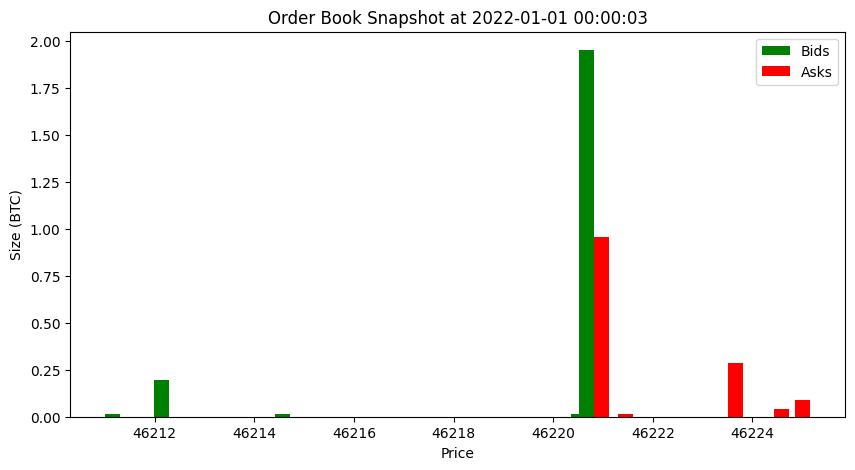

In [3]:
print("Now we can visualize the snapshot:")

import matplotlib.pyplot as plt

def makeplot():
    
    bids, asks = fisher.get_snapshot()
    # Take the top 5 bids and asks
    top_n = 5
    top_bids = bids[:top_n, :]
    top_asks = asks[:top_n, :]

    # Extract price and size
    bid_prices, bid_sizes = top_bids[:, 0], top_bids[:, 1]
    ask_prices, ask_sizes = top_asks[:, 0], top_asks[:, 1]

    plt.figure(figsize=(10, 5))

    plt.bar(bid_prices, bid_sizes, width=-0.3, align='edge', label='Bids', color='green')
    plt.bar(ask_prices, ask_sizes, width=0.3, align='edge', label='Asks', color='red')

    plt.xlabel('Price')
    plt.ylabel(f'Size (BTC)')
    plt.title(f'Order Book Snapshot at {fisher.time}')
    plt.legend()
    plt.show()
    
makeplot()

In [4]:
print(f"To take a step of {stepsize} seconds, we can call fisher.next()")
fisher.next()
print("Fisher time is now: ", fisher.time)

To take a step of 1 seconds, we can call fisher.next()
Fisher time is now:  2022-01-01 00:00:04


We made a new plot:


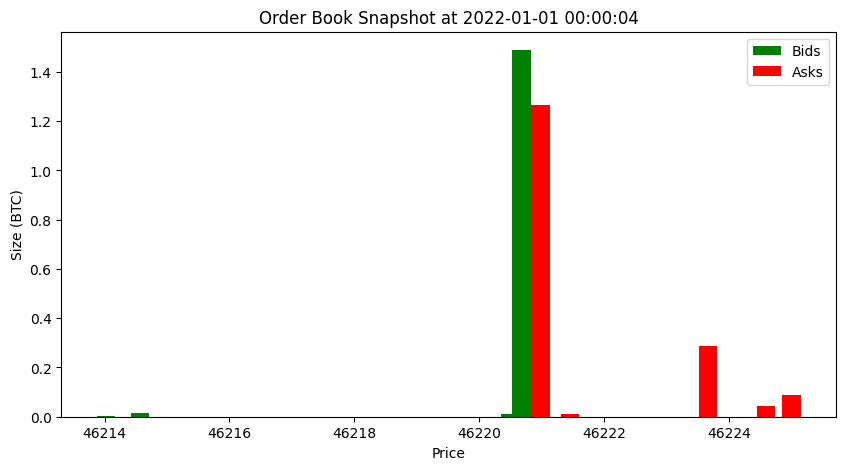

In [5]:
print("We made a new plot:")
makeplot()

In [7]:
print("to see all updates that happened in the last step, we can call fisher.get_updates()")
print(fisher.get_updates())
# NOTE: the output is a list of lists of the form (side, price, absolute volume)

to see all updates that happened in the last step, we can call fisher.get_updates()
[['ask' '46220.828125' '1.0623300075531006']
 ['ask' '46229.16015625' '0.0']
 ['ask' '50914.3515625' '0.0']
 ['bid' '43906.078125' '0.0002300000051036477']
 ['bid' '41657.19921875' '0.0']
 ['ask' '46229.0703125' '0.15494999289512634']
 ['ask' '50842.8984375' '0.0020000000949949026']
 ['bid' '46220.8203125' '1.8523099422454834']
 ['bid' '46206.51171875' '0.08438000082969666']
 ['bid' '46185.44921875' '0.3806999921798706']
 ['bid' '46172.98828125' '0.0']
 ['bid' '45864.12109375' '0.0']
 ['bid' '41598.73046875' '0.0020000000949949026']
 ['bid' '23069.98046875' '0.0004400000034365803']
 ['ask' '46223.5' '0.0']
 ['ask' '46224.83984375' '0.0']
 ['ask' '46226.26953125' '0.0']
 ['ask' '46226.28125' '0.0']
 ['bid' '46208.37890625' '0.3037700057029724']
 ['bid' '46206.51171875' '0.0']
 ['bid' '46205.78125' '0.0']
 ['bid' '46110.6484375' '0.3832800090312958']
 ['bid' '40212.12109375' '0.00215000007301569']
 ['ask'

In [9]:
print("to see all trades that happened in the last step, we can call fisher.get_trades()")
print(fisher.get_trades())
# NOTE: the output is a list of lists of the form (trade id, side, price, volume)

to see all trades that happened in the last step, we can call fisher.get_trades()
[['1207692040' 'sell' '46220.8203125' '0.0021699999924749136']
 ['1207692041' 'sell' '46220.8203125' '0.09670999646186829']
 ['1207692042' 'sell' '46220.8203125' '0.0034799999557435513']
 ['1207692043' 'sell' '46220.8203125' '0.09164000302553177']
 ['1207692044' 'sell' '46220.8203125' '0.014670000411570072']
 ['1207692045' 'buy' '46220.828125' '0.033569999039173126']
 ['1207692046' 'sell' '46220.8203125' '0.00107999995816499']
 ['1207692047' 'sell' '46220.8203125' '0.0009200000204145908']
 ['1207692048' 'buy' '46220.828125' '0.002369999885559082']
 ['1207692049' 'buy' '46220.828125' '0.0002899999963119626']
 ['1207692050' 'sell' '46220.8203125' '0.3378700017929077']]
